# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [ ]:
import itertools

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)#OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

### Analisis exploratorio y visualizacion del DataFrame

In [ ]:
# Conjunto de Train
URL = 'https://drive.google.com/file/d/16SSOt06KitPEkAXQwfPyM16jojqCxwtl/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
# Conjunto de Test
URL = 'https://drive.google.com/file/d/1EVGW3CQeKZjtkdusFIp9KjqF87rFl264/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
test_df = pd.read_csv(path)

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [ ]:
#analizamos las columnas
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
#analizamos la cantidad de datos por columna y si hay valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


In [ ]:
#Analizamos la cantidad de datos faltantes
missing_values_count = df.isna().sum()
missing_values_count

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

### Imputacion y transformacion de variables

In [ ]:
# Extraemos nuestro target del resto de variables
y = df.Transported
X = df.copy()

In [ ]:
# Para la Columna Destino cambiamos los nombres de las columnas
dic_dest = {'TRAPPIST-1e' : 'Destination_TRAPPIST-1e',
        '55 Cancri e' : 'Destination_55 Cancri e',
        'PSO J318.5-22' : 'Destination_PSO J318.5-22',
        np.nan : np.nan}
X['Destination'] = X['Destination'].map(dic_dest)

In [ ]:
# Hacemos un one hot ( con get.dummies) dividiendo las categorias de destino
x_dest = pd.get_dummies(X['Destination'])
for i in range(len(x_dest)):
    if (x_dest.iloc[i,0]+x_dest.iloc[i,1]+x_dest.iloc[i,2]) == 0:
        x_dest.iloc[i,:] = x_dest.iloc[i,:].replace(0, np.nan)
a = x_dest.columns
X[a] = x_dest

In [ ]:
# Para la Columna HomePlanet cambiamos los nombres 
dic_planet = {'Earth' : 'HomePlanet_Earth',
              'Europa' : 'HomePlanet_Europa',
              'Mars' : 'HomePlanet_Mars',
              np.nan : np.nan}
X['HomePlanet'] = X['HomePlanet'].map(dic_planet)

In [ ]:
# Hacemos un one hot dividiendo las categorias de destino
x_home = pd.get_dummies(X['HomePlanet'])
for i in range(len(x_dest)):
    if (x_home.iloc[i,0]+x_home.iloc[i,1]+x_home.iloc[i,2]) == 0:
        x_home.iloc[i,:] = x_home.iloc[i,:].replace(0, np.nan)
a = x_home.columns
X[a] = x_home

In [ ]:
#Separamos en tres columnas "Cabin"
X[['Cabin_Deck','Cabin_Num','Cabin_Side']] = X['Cabin'].str.split('/',expand=True)

In [ ]:
# hacemos encodig de variables categoricas que tienen un cierto orden
Label_cols = ['VIP', 'CryoSleep', 'Cabin_Deck', 'Cabin_Side' ]
for col in Label_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
# Volvemos a  definir las variables nan para luego ser imputadas 
Label_col = ['VIP', 'CryoSleep', 'Cabin_Side' ]
X[Label_col] = X[Label_col].replace(2, np.nan)
X['Cabin_Deck'] = X['Cabin_Deck'].replace(8, np.nan)

In [ ]:
#limpiamos el dataset antes de imputar los valores faltantes
X = X.drop(['Cabin', 'Destination', 'HomePlanet', 'Name', 'PassengerId'],axis=1)

In [ ]:
X.isna().sum()

CryoSleep                    196
Age                          162
VIP                          184
RoomService                  154
FoodCourt                    155
ShoppingMall                 188
Spa                          158
VRDeck                       169
Transported                    0
Destination_55 Cancri e      160
Destination_PSO J318.5-22    160
Destination_TRAPPIST-1e      160
HomePlanet_Earth             179
HomePlanet_Europa            179
HomePlanet_Mars              179
Cabin_Deck                   184
Cabin_Num                    184
Cabin_Side                   184
dtype: int64

In [ ]:
X['Cabin_Num'] = X['Cabin_Num'].astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  7627 non-null   float64
 1   Age                        7661 non-null   float64
 2   VIP                        7639 non-null   float64
 3   RoomService                7669 non-null   float64
 4   FoodCourt                  7668 non-null   float64
 5   ShoppingMall               7635 non-null   float64
 6   Spa                        7665 non-null   float64
 7   VRDeck                     7654 non-null   float64
 8   Transported                7823 non-null   int64  
 9   Destination_55 Cancri e    7663 non-null   float64
 10  Destination_PSO J318.5-22  7663 non-null   float64
 11  Destination_TRAPPIST-1e    7663 non-null   float64
 12  HomePlanet_Earth           7644 non-null   float64
 13  HomePlanet_Europa          7644 non-null   float

In [ ]:
# Standarizamos y escalamos los valores antes de imputar
x_names = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Imputamos todos los valores con knnimputer
from sklearn.impute import KNNImputer

X_knn = X.copy()
knn_imputer = KNNImputer(n_neighbors=9, weights="uniform")
X_knn = knn_imputer.fit_transform(X_knn)

# Volvemos a combertirlo en DF
X_knn = pd.DataFrame(X_knn, columns=x_names)
X_knn

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_Deck,Cabin_Num,Cabin_Side
0,-0.752195,1.944636,-0.156665,-0.332891,2.099303,-0.266942,-0.097078,3.272797,-1.013513,-0.518776,-0.322521,0.664453,-1.079555,1.717669,-0.513498,-1.288175,-0.929337,-1.005118
1,1.329442,-0.752347,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,0.986667,-0.246955,-0.322521,0.423403,-1.079555,-0.582184,1.947428,0.394898,-0.923471,0.994908
2,1.329442,0.284954,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,0.986667,-0.518776,-0.322521,0.664453,-1.079555,1.717669,-0.513498,-1.849199,-0.499119,0.994908
3,-0.752195,0.976488,-0.156665,-0.123802,0.464079,-0.288685,-0.269134,-0.083662,-1.013513,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.394898,1.606993,-1.005118
4,-0.752195,-0.683193,-0.156665,-0.332891,-0.281056,0.831932,-0.268252,-0.239138,-1.013513,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.955922,-1.152268,-1.005118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,-0.752195,-1.167267,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,0.986667,-0.518776,-0.322521,0.664453,-1.079555,-0.582184,1.947428,0.394898,1.409484,0.994908
7819,-0.752195,1.045642,-0.156665,-0.332891,-0.281056,0.955702,-0.214429,-0.267489,-1.013513,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.955922,-0.272277,0.994908
7820,1.329442,1.806329,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,0.986667,-0.518776,-0.322521,0.664453,-1.079555,-0.582184,1.947428,0.394898,2.295342,-1.005118
7821,-0.752195,-0.959807,-0.156665,-0.332891,0.237084,-0.082960,-0.269134,-0.251942,-1.013513,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,-0.166126,-0.675118,-1.005118


In [ ]:
X_knn.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_Deck,Cabin_Num,Cabin_Side
count,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7.823000e+03,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000
mean,0.004038,0.000265,-0.000898,0.001151,-0.000737,0.000437,0.000082,-0.000232,-9.173567e-17,-0.000742,-0.000373,0.000895,0.001623,-0.002934,0.001148,-0.002330,-0.001147,0.001755
std,0.996771,0.991958,0.989448,0.993913,0.994100,0.991819,0.992510,0.994674,1.000064e+00,0.992037,0.991576,0.991675,0.995355,0.995151,0.993948,0.998767,0.992585,0.989710
min,-0.752195,-1.997108,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,-1.013513e+00,-0.518776,-0.322521,-1.504998,-1.079555,-0.582184,-0.513498,-2.410223,-1.169868,-1.005118
25%,-0.752195,-0.614040,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,-1.013513e+00,-0.518776,-0.322521,-1.504998,-1.079555,-0.582184,-0.513498,-0.727150,-0.837427,-1.005118
50%,-0.752195,-0.129966,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,9.866669e-01,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.394898,-0.328988,0.106007
75%,1.329442,0.630721,-0.156665,-0.256323,-0.232874,-0.235999,-0.211782,-0.221304,9.866669e-01,-0.518776,-0.322521,0.664453,0.926308,1.206591,-0.513498,0.955922,0.748513,0.994908
max,1.329442,3.466011,6.383038,20.763035,18.108586,39.003179,19.502346,21.800998,9.866669e-01,1.927613,3.100576,0.664453,0.926308,1.717669,1.947428,1.516947,2.531962,0.994908


In [ ]:
X_knn.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Cabin_Deck                   0
Cabin_Num                    0
Cabin_Side                   0
dtype: int64

Text(0.5, 1.0, 'Correlacion entre variables')

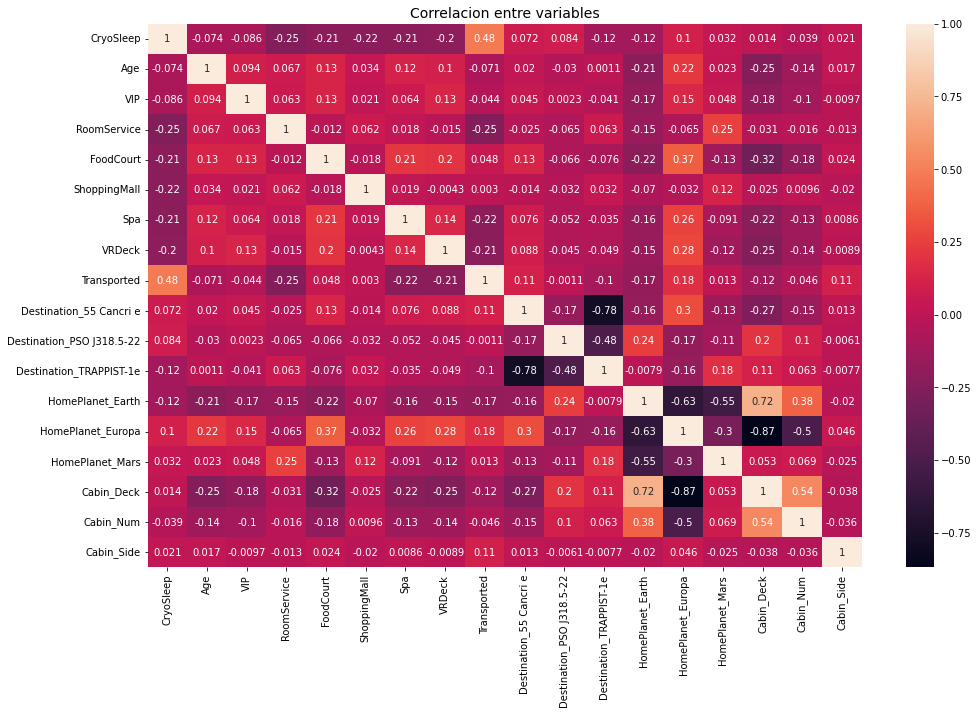

In [ ]:
#analizamos la correlacion entre las variables
plt.figure(figsize=(16,10))
sns.heatmap(X_knn.corr(),annot=True,fmt='.2g')
plt.title('Correlacion entre variables', fontsize=14)

 Con la caracteristica que más se correlaciona con nuestro target es CryoSleep, aunque es baja  al igual que el resto.

In [ ]:
X_knn.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Cabin_Deck                   0
Cabin_Num                    0
Cabin_Side                   0
dtype: int64

In [ ]:
# Elimino mi target del resto del dataset
X_knn = X_knn.drop('Transported', axis=1)

In [ ]:
# Dividimos los datos para el entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(X_knn, y, train_size=0.8, random_state = 8)

In [ ]:
x_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_Deck,Cabin_Num,Cabin_Side
4320,1.329442,0.284954,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,-0.518776,3.100576,-1.504998,0.926308,-0.582184,-0.513498,0.955922,0.805224,0.994908
1437,1.329442,-1.305574,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.955922,0.586855,-0.116218
1690,-0.752195,1.391409,-0.156665,-0.332891,-0.269953,-0.288685,-0.269134,0.357159,-0.518776,3.100576,-1.504998,0.926308,-0.582184,-0.513498,0.394898,2.084144,0.994908
3525,-0.752195,-0.268273,-0.156665,0.771454,-0.281056,-0.106376,0.055567,-0.270233,-0.518776,-0.322521,0.664453,-1.079555,-0.582184,1.947428,0.394898,0.642914,0.994908
4700,-0.752195,-0.683193,-0.156665,-0.332891,0.159363,-0.285340,-0.269134,-0.270233,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.644242,0.220084,0.328232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,-0.752195,1.391409,-0.156665,0.189832,-0.004098,-0.275305,-0.269134,-0.270233,-0.518776,-0.322521,0.664453,0.926308,-0.582184,-0.513498,0.955922,0.998822,-1.005118
2409,-0.752195,-0.268273,-0.156665,-0.332891,2.563778,-0.288685,2.011715,1.484820,-0.518776,-0.322521,0.664453,-1.079555,1.717669,-0.513498,-1.288175,-0.739650,-1.005118
2033,-0.752195,0.699875,-0.156665,-0.332891,-0.281056,-0.288685,0.740263,-0.270233,-0.518776,3.100576,-1.504998,0.926308,-0.582184,-0.513498,0.394898,0.173585,0.994908
1364,1.329442,0.769028,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,1.927613,-0.322521,-1.504998,-1.079555,1.717669,-0.513498,-1.849199,-1.054492,-1.005118


#### Prueba con varios modelos de aprendisaje supervisado

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest', 
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 99.98%
Accuracy test Arbol de decisión: 74.76%
Random Forest
Accuracy train Random Forest: 99.97%
Accuracy test Random Forest: 81.53%
Regresión Logística
Accuracy train Regresión Logística: 79.90%
Accuracy test Regresión Logística: 79.74%
Perceptrón multicapa


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy train Perceptrón multicapa: 83.49%
Accuracy test Perceptrón multicapa: 82.04%
XGBoost
Accuracy train XGBoost: 82.84%
Accuracy test XGBoost: 82.17%
Naive Bayes
Accuracy train Naive Bayes: 73.55%
Accuracy test Naive Bayes: 73.35%
SVM
Accuracy train SVM: 79.47%
Accuracy test SVM: 79.62%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Regresion Logistica

In [ ]:
param_grid_re = [{
    'penalty' : ['l1', 'l2'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'C': [0.6 ,0.7, 0.8, 0.9, 0.5, 1],
    'random_state' : [43],
    'max_iter' : [100, 200, 1000],
    'l1_ratio' : [0, 0.2, 0.4, 0.6, 0.8, 1]
}]

In [ ]:
# Regresión Logística

clf_re = LogisticRegression()
cv_re = GridSearchCV(clf_re, param_grid_re, scoring='accuracy') 
cv_re.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penal

KeyboardInterrupt: ignored

In [ ]:
cv_re.best_params_

In [ ]:
# Reportamos accuracy promedio y varianza para todas las configuraciones
results = cv_re.cv_results_
#mean = results['mean_test_score'] # accuracy promedio
#std = results['std_test_score'] # varianza
df = pd.DataFrame(results)
df[['param_penalty', 'param_solver', 'param_C','param_l1_ratio', 'param_random_state', 'param_max_iter', 'mean_test_score', 'std_test_score']]\
  .sort_values(by=['mean_test_score'], ascending=False)

#### Perceptrón multicapa 

In [ ]:
# Perceptrón multicapa 

In [ ]:
from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

param_grid = [{
    'hidden_layer_sizes' : [10, 15],
    'activation' : ['logistic', 'tanh', 'relu'],
    'solver' : ['sgd'], 
    'alpha': [0.0001, 0.001, 0.01], 
    'batch_size' : [50, 20],
    'random_state' : [43],
    'learning_rate' : ['constant', 'adaptive'],
    'learning_rate_init' : [0.001, 0.01, 0.1],
    'shuffle' : [True],
    'verbose' : [True],
    'tol' : [0.0022, 0.01, 0.0001, 0.0008],
    'max_iter' : [1000]
}]

In [ ]:
#Perceptron multiclase
model = neural_network.MLPClassifier()
cv = GridSearchCV(model, param_grid, scoring='accuracy') # cv None (default) to use the default 5-fold cross validation
cv.fit(x_train, y_train);

In [ ]:
cv.cv_results_.keys()

In [ ]:
cv.best_params_

In [ ]:
# Reportamos accuracy promedio y varianza para todas las configuraciones
results_neu = cv.cv_results_
#mean = results['mean_test_score'] # accuracy promedio
#std = results['std_test_score'] # varianza
df_neu = pd.DataFrame(results_neu)
df_neu = df_neu.sort_values(by=['mean_test_score'], ascending=False)
df_neu

In [ ]:
#Usamos neural_network

from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

clf = neural_network.MLPClassifier(
    activation='tanh',
    solver='sgd',
    alpha=0.01, 
    hidden_layer_sizes=(10),
    learning_rate='adaptive',
    learning_rate_init=0.1,
    batch_size=20,
    random_state=43,
    max_iter=1000,
    verbose=True,
    shuffle=True,
    tol=0.0001,
    )

In [ ]:
clf.fit(x_train, y_train.ravel())

In [ ]:
clf.score(x_test, y_test)

In [ ]:
total_params = 0
for case, name in zip(clf.coefs_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

for case, name in zip(clf.intercepts_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

print('total params = ', total_params)

In [ ]:
np.round(np.exp(clf.predict_log_proba(x_train)),1)

In [ ]:
predictions = clf.predict(x_train)
print (f'Accuracy: {accuracy_score(y_train, predictions)*100:.2f}')

#### Random Forest

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay



In [ ]:
param_grid_rf = [{
       'n_estimators': [ 180, 200,250],
        'criterion'    : ['gini'],
        'max_depth'    : [ 10, 20],
        'max_features' : [3, 4, 5],
        'n_jobs'       : [-1],#means using all processors
        'random_state' : [0]
}]

In [ ]:
clf_rf = RandomForestClassifier()
cv = GridSearchCV(clf_rf, param_grid_rf, scoring='accuracy') 
cv.fit(x_train, y_train);

In [ ]:
cv.cv_results_.keys()

In [ ]:
cv.best_params_

In [ ]:
# Reportamos accuracy promedio y varianza para todas las configuraciones
results_rf = cv.cv_results_
#mean = results['mean_test_score'] # accuracy promedio
#std = results['std_test_score'] # varianza
df_rf = pd.DataFrame(results_rf)
df_rf = pd.DataFrame(results_rf).sort_values(by=['mean_test_score'], ascending=False)
#df[['param_penalty', 'param_loss', 'param_alpha', 'param_learning_rate', 'mean_test_score', 'std_test_score']]\
  #.sort_values(by=['mean_test_score'], ascending=False)
df_rf

In [ ]:
clf_rf.score(x_train, y_train)

In [ ]:
predictions = clf_rf.predict(x_train)
print (f'Accuracy: {accuracy_score(y_train, predictions)*100:.2f}')


#### DecisionTreeClassifier


In [ ]:
param_grid_dt = {
    'criterion' : ['gini', 'entropía', 'log_loss'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
    'min_samples_leaf': [1, 5, 10, 15, 20],
    'random_state' : [0],
    'ccp_alpha' : [0, 0.2, 0.6, 0.9, 1, 1.3, 2, 5]
}

In [ ]:
clf_dt = DecisionTreeClassifier()
cv_dt = GridSearchCV(clf_dt, param_grid_dt, scoring='accuracy') # cv None (default) to use the default 5-fold cross validation
cv_dt.fit(x_train, y_train)

In [ ]:
cv_dt.best_params_

In [ ]:
# Reportamos accuracy promedio y varianza para todas las configuraciones
results_dt = cv_dt.cv_results_
#mean = results['mean_test_score'] # accuracy promedio
#std = results['std_test_score'] # varianza
df_dt = pd.DataFrame(results_dt).sort_values(by=['mean_test_score'], ascending=False)
df_dt

In [ ]:
clf_dt.score(x_train, y_train)

In [ ]:
predictions = clf_dt.predict(x_train)
print (f'Accuracy: {accuracy_score(y_train, predictions)*100:.2f}')

#### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

In [ ]:
y_pred = gnb.predict(x_test)
print("Métricas de validación para el mejor ajuste")
print("Accuracy = %s" % accuracy_score(y_test, y_pred))
print("Precision = %s" % precision_score(y_test, y_pred))
print("Recall = %s" % recall_score(y_test, y_pred))
print("F1 = %s" % f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Cumplió_0', 'Incumplió_1'])

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

In [ ]:
xgb.score(x_test, y_test)

In [ ]:
model = XGBClassifier(random_state=0)
from scipy.stats import uniform, randint

params = {
    "max_depth": range(1, 11, 2), # default 3
    "n_estimators": range(50, 400, 50), # default 100   
}

cv = GridSearchCV(model, params, scoring='accuracy') # cv None (default) to use the default 5-fold cross validation
cv.fit(x_train, y_train)

In [ ]:
cv.best_params_

In [ ]:
# summarize results
results = cv.cv_results_
print("Best: %f using %s" % (cv.best_score_, cv.best_params_))
means = results['mean_test_score']
stds = results['std_test_score']
parameters = results['params']
for mean, stdev, param in zip(means, stds, parameters):
	print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# plot results
max_depth = range(1, 11, 2)
n_estimators = range(50, 400, 50)
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.savefig('n_estimators_vs_max_depth.png')

In [ ]:
best_model = cv.best_estimator_
# métricas de validación
y_pred = best_model.predict(X_test)
print("Métricas de validación para el mejor ajuste")
print("Accuracy = %s" % accuracy_score(y_test, y_pred))
print("Precision = %s" % precision_score(y_test, y_pred))
print("Recall = %s" % recall_score(y_test, y_pred))
print("F1 = %s" % f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Cumplió_0', 'Incumplió_1'])

#### SVM

In [ ]:
# Usamos SVM, clasificador lineal basado en una máquina de soporte compacto
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

Grandes valores de C resultan en márgenes menores y pequeños valores de C resultan en márgenes más amplios

In [ ]:
metrics = {}
for C in np.linspace(0.1, 100, 10):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=26)
    # entrenamos
    clf.fit(x_train, y_train.ravel())
    # predecimos
    predictions = clf.predict(x_train)
    # calculamos el Accuracy
    metrics.update({ 'C = '+str(round(C, 3)): (accuracy_score(y_train, predictions)*100) })

print('\n=== Accuracys ===\n')
metrics

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number


=== Accuracys ===



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'C = 0.1': 78.69926494087568,
 'C = 100.0': 76.70182166826463,
 'C = 11.2': 79.86577181208054,
 'C = 22.3': 78.92297858740812,
 'C = 33.4': 78.8111217641419,
 'C = 44.5': 78.45957174816235,
 'C = 55.6': 78.50751038670502,
 'C = 66.7': 76.35027165228507,
 'C = 77.8': 77.75647171620325,
 'C = 88.9': 77.78843080856504}

In [ ]:
print('=== Best Model ===\n {}, Accuracy: {}'.format(
        max(metrics, key=metrics.get), 
        max(metrics.values())
    )
)

=== Best Model ===
 C = 11.2, Accuracy: 79.86577181208054


### Usamos VotingClassifier para los mejores modelos

Dentro de los modelos entrenados que mayor accuracy nos dieron, instanciamos los mismos con los mejores hiperparámetros, encontrados durante el entrenamiento,  para dar una predicción mejor con el Voting. El cual es un clasificador compuesto de varios clasificadores, en este caso usamos Random Forest (Bagging), perceptron multicapas con redes neuronales y xgboost (Boosting). El "Voting" simplemente elige la clase que tuvo "más votos" de los modelos que lo componen. El método de votacion elegido es "soft" que considera la probabilidad de los votos.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(
    criterion = 'entropy',
    n_jobs = -1,
    max_depth = 20,
    max_features = 5,
    n_estimators = 200,
    random_state = 0,
    )

clf2 = neural_network.MLPClassifier(
    activation='tanh',
    solver='sgd',
    alpha=0.01, 
    hidden_layer_sizes=(10),
    learning_rate='adaptive',
    learning_rate_init=0.1,
    batch_size=20,
    random_state=43,
    max_iter=1000,
    verbose=True,
    shuffle=True,
    tol=0.0001,
    )
clf3 = XGBClassifier(
        max_depth= 7,
        n_estimators = 150
        )

eclf1 = VotingClassifier(estimators=[('RF', clf1), ('PM', clf2), ('NE', clf3)], voting='soft')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
print(classification_report(y_test, test_predictions))


## Generar la salida para entregar

#### Imputacion y curacion

In [ ]:
test_df

In [ ]:
test_df.info()

In [ ]:
X_t = test_df.copy()

In [ ]:
# Para la Columna Destino cambiamops los nan por la moda 
dic_dest_t = {'TRAPPIST-1e' : 'Destination_TRAPPIST-1e',
        '55 Cancri e' : 'Destination_55 Cancri e',
        'PSO J318.5-22' : 'Destination_PSO J318.5-22',
        np.nan : np.nan}
X_t['Destination'] = X_t['Destination'].map(dic_dest_t)

In [ ]:
# Hacemos un one hot dividiendo las categorias de destino
x_dest_t = pd.get_dummies(X_t['Destination'])
for i in range(len(x_dest_t)):
    if (x_dest_t.iloc[i,0]+x_dest_t.iloc[i,1]+x_dest_t.iloc[i,2]) == 0:
        x_dest_t.iloc[i,:] = x_dest_t.iloc[i,:].replace(0, np.nan)
a = x_dest_t.columns
X_t[a] = x_dest_t

In [ ]:
# Para la Columna HomePlanet cambiamos los nan por la moda 
dic_planet_t = {'Earth' : 'HomePlanet_Earth',
              'Europa' : 'HomePlanet_Europa',
              'Mars' : 'HomePlanet_Mars',
              np.nan : np.nan}
X_t['HomePlanet'] = X_t['HomePlanet'].map(dic_planet_t)

In [ ]:
# Hacemos un one hot dividiendo las categorias de destino
x_home_t = pd.get_dummies(X_t['HomePlanet'])
for i in range(len(x_home_t)):
    if (x_home_t.iloc[i,0]+x_home_t.iloc[i,1]+x_home_t.iloc[i,2]) == 0:
        x_home_t.iloc[i,:] = x_home_t.iloc[i,:].replace(0, np.nan)
a = x_home_t.columns
X_t[a] = x_home_t

In [ ]:
#Separamos en tres columnas "Cabin"
X_t[['Cabin_Deck','Cabin_Num','Cabin_Side']] = X_t['Cabin'].str.split('/',expand=True)

In [ ]:
# hacemos encodig de variables categoricas que tienen un cierto orden
Label_cols = ['VIP', 'CryoSleep', 'Cabin_Deck', 'Cabin_Side' ]
for col in Label_cols:
    X_t[col] = LabelEncoder().fit_transform(X_t[col])

In [ ]:
# Volvemos a  definir las variables nan para luego ser imputadas
Label_col = ['VIP', 'CryoSleep', 'Cabin_Side' ]
X_t[Label_col] = X_t[Label_col].replace(2, np.nan)
X_t['Cabin_Deck'] = X_t['Cabin_Deck'].replace(8, np.nan)

In [ ]:
id_t = X_t['PassengerId']

In [ ]:
#limpiamos el dataset antes de imputar los valores faltantes
X_t = X_t.drop(['Cabin', 'Destination', 'HomePlanet', 'Name', 'PassengerId'],axis=1)

In [ ]:
X_t['Cabin_Num'] = X_t['Cabin_Num'].astype(float)
X_t.info()

In [ ]:
# Standarizamos y escalamos los valores antes de imputar
x_names = X_t.columns
scaler = StandardScaler()
X_t = scaler.fit_transform(X_t)

In [ ]:
# Imputamos todos los valores con knnimputer
from sklearn.impute import KNNImputer

X_knn_t = X_t.copy()
knn_imputer = KNNImputer(n_neighbors=9, weights="uniform")
X_knn_t = knn_imputer.fit_transform(X_knn_t)

# Volvemos a combertirlo en DF
X_knn_t = pd.DataFrame(X_knn_t, columns=x_names)
X_knn_t

### Generamos la salida

In [ ]:
# Realizamos la predicción con el conjunto de test
test_pred = eclf1.predict(X_knn_t)

In [ ]:
submission = pd.DataFrame(list(zip(id_t, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

In [ ]:
submission

In [ ]:
from google.colab import files
files.download('sample_submission.csv')